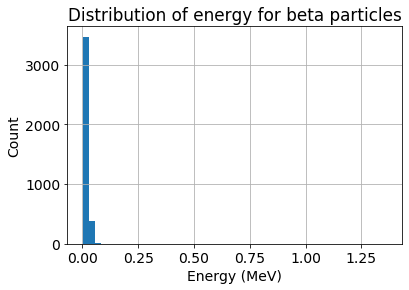

Average energy deposited: 899.09782492287


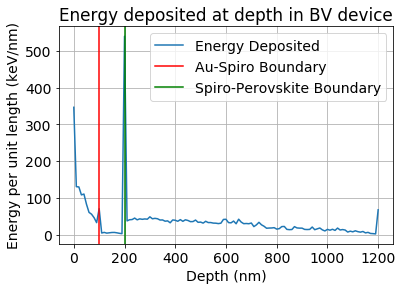

Total energy deposited 43250430.35252664
Au: 11029675.036879968 Spiro-OMeTAD: 1126311.0944999987 Perovskite: 31094444.221146677
Au ratio: 0.2550188506097865 Spiro-OMeTAD ratio: 0.026041615894215046 Perovskite ratio: 0.7189395334959985


In [23]:
# Check distribution of energy particles

import csv
import matplotlib.pyplot as plt
import math
import matplotlib

starting_energy = []
energy_dep = []

max_eng = {}
depths = {}

au_dep = 0
spiro_dep = 0
pero_dep = 0

# 100nm_au is 100nm au layer, 100nm spiro layer and 1um pero layer for sr90/y90 radioisotope source
# energy_dist is 50um au layer, 100um spiro layer, and 650um pero layer for sr90/y90 radioisotope source
# h3 is 800um pero for h3 radioisotope source
# ni63 is 800um pero for ni63 radioisotope source
# puresr is 800um pero for sr90 radioisotope source
# replace the below files with the files to be analysed
files = ["100nm_au_t0.csv", "100nm_au_t1.csv"]

DEPTH_INDEX = 4
KINETIC_ENERGY_DIFF_INDEX = 7
KINETIC_ENERGY_INDEX = 10

AU_SPIRO_DEPTH = 100
SPIRO_PERO_DEPTH = 200

ENERGY_THRESHOLD = 0.0001

# define dict for depth and above energy threshold data
max_depth = 1200
slice_width = 10
for i in range(0, max_depth + slice_width, slice_width):
    max_eng[i] = 0
    depths[i] = []
    
# iterate through results and extract data   
for result_file in files:
    with open(result_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if len(row) > 1:
                depth = float(row[DEPTH_INDEX])
                if depth < 0 or depth > max_depth:
                    continue
                if depth == 0:
                    starting_energy.append(float(row[KINETIC_ENERGY_INDEX]))
                if depth < AU_SPIRO_DEPTH:
                    au_dep += float(row[KINETIC_ENERGY_DIFF_INDEX])
                elif depth < SPIRO_PERO_DEPTH:
                    spiro_dep += float(row[KINETIC_ENERGY_DIFF_INDEX])
                elif depth < max_depth:
                    pero_dep += float(row[KINETIC_ENERGY_DIFF_INDEX])

                energy_dep.append(float(row[KINETIC_ENERGY_DIFF_INDEX]))
                rounded_depth = slice_width * math.floor(depth/slice_width)
                depths[rounded_depth].append(float(row[KINETIC_ENERGY_DIFF_INDEX]))

                if float(row[KINETIC_ENERGY_INDEX]) > ENERGY_THRESHOLD:
                    rounded_depth = slice_width * math.floor(depth/slice_width)
                    max_eng[rounded_depth] += 1

# set large font for matlab
font_size = {'size': '14'}
matplotlib.rc('font', **font_size)
                    
# plot the energy distribution of all starting beta particles
n, bins, patches = plt.hist(starting_energy, 50)
plt.grid(True)
plt.xlabel('Energy (MeV)')
plt.ylabel('Count')
plt.title('Distribution of energy for beta particles')
plt.show()

print("Average energy deposited:", sum(energy_dep)/len(energy_dep))

# plot the energy deposited per depth

depth_vec = []
energy_vec = []
for depth, energy in sorted(depths.items()):
    depth_vec.append(depth)
    energy_vec.append(sum(energy)/slice_width)

# um_depth_vec = [i / 1000 for i in depth_vec]
k_energy_vec = [i / 1000 for i in energy_vec]
    
plt.plot(depth_vec, k_energy_vec)
plt.title('Energy deposited at depth in BV device')
plt.xlabel('Depth (nm)')
plt.ylabel('Energy per unit length (keV/nm)')

plt.grid(True)

plt.axvline(x=AU_SPIRO_DEPTH, ymin=0, ymax=1, color='r')
plt.axvline(x=SPIRO_PERO_DEPTH, ymin = 0, ymax=1, color='g')
plt.legend(['Energy Deposited', 'Au-Spiro Boundary', 'Spiro-Perovskite Boundary'])
plt.show()

# print out ratio of energy that is deposited
total = au_dep + spiro_dep + pero_dep
print('Total energy deposited', total)
print('Au:', au_dep, 'Spiro-OMeTAD:', spiro_dep, 'Perovskite:', pero_dep)
print('Au ratio:', au_dep/total, 'Spiro-OMeTAD ratio:', spiro_dep/total, 'Perovskite ratio:', pero_dep/total)


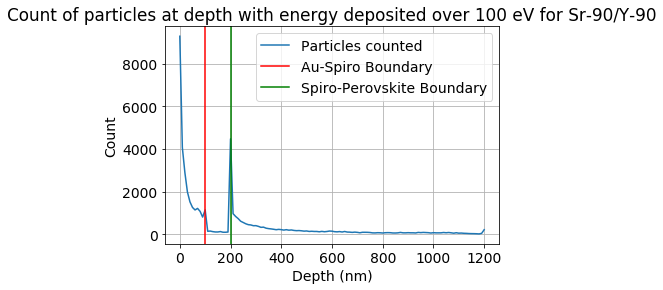

In [21]:
# find occurences where the energy absorbed exceeds maximum threshold
depth_vec = []
max_eng_vec = []
for depth, eng in sorted(max_eng.items()):
    depth_vec.append(depth)
    max_eng_vec.append(eng)

plt.plot(depth_vec, max_eng_vec)
plt.title('Count of particles at depth with energy deposited over 100 eV for Sr-90/Y-90')
plt.xlabel('Depth (nm)')
plt.ylabel('Count')
plt.axvline(x=AU_SPIRO_DEPTH, ymin=0, ymax=1, color='r')
plt.axvline(x=SPIRO_PERO_DEPTH, ymin = 0, ymax=1, color='g')
plt.legend(['Particles counted', 'Au-Spiro Boundary', 'Spiro-Perovskite Boundary'])
plt.grid(True)
plt.show()